In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import retentioneering

In [92]:
data_action = pd.read_csv(r'C:\Users\Katerina\Питонячье\Diploma\AN-996.csv')
data0 = pd.read_csv(r'C:\Users\Katerina\Питонячье\Diploma\modified_data.csv')
data_action

,dt,user_hash,action
0,2021-08-04 05:17:21,4766523093487740533,abandoned_step
1,2021-08-04 09:57:32,8844031830567918474,abandoned_step
2,2021-08-04 13:43:11,9597316936381557906,abandoned_step
3,2021-08-04 14:44:54,6441677487337749613,abandoned_step
4,2021-08-04 15:12:24,1538309979517857225,abandoned_step
...,...,...,...
25504895,2021-12-30 17:45:35,9037027244877101543,viewed_step
25504896,2021-12-30 17:45:38,17267855088208330080,viewed_step
25504897,2021-12-30 17:45:40,12253945569312787381,viewed_step
25504898,2021-12-30 17:45:41,12693713996304919558,viewed_step


In [94]:
data0

,last_login,date_joined,date_registered,subscribed_for_marketing,is_beta,is_subscribed_to_notifications,city_by_ip_id,country_by_ip_id,region_by_ip_id,free_till,...,selected_track_Kotlin_Basics,selected_track_Kotlin_Developer,selected_track_Kotlin_Developer_TEST_(advanced_track),selected_track_Natural_Language_Processing,selected_track_None,selected_track_Python_Core,selected_track_Python_for_Beginners,selected_track_Spring_track_-_test,selected_track_Track_for_Beta-Testing,selected_track_test_-_Spring_Boot_track
0,2021-11-05 11:08:08.347083,2017-06-30 00:00:00.000000,2017-06-30 00:00:00.000000,1,0,1,NaN,2635167.0,NaN,2021-01-01 10:00:00,...,0,0,0,0,0,0,0,0,0,0
1,2021-09-27 16:35:49.209033,2017-06-30 00:00:00.000000,2017-06-30 00:00:00.000000,1,0,1,NaN,2017370.0,NaN,2021-01-01 10:00:00,...,1,1,0,0,0,0,0,0,0,0
2,2020-04-20 12:24:02.310151,2017-06-30 00:00:00.000000,2017-06-30 00:00:00.000000,0,1,0,NaN,2921044.0,NaN,2021-01-01 10:00:00,...,0,0,0,0,1,0,0,0,0,0
3,2021-02-19 09:52:36.168529,2017-06-30 00:00:00.000000,2017-06-30 00:00:00.000000,1,1,1,NaN,2921044.0,NaN,2021-08-16 14:05:03.215693,...,0,0,0,0,0,0,0,0,0,0
4,2019-07-07 11:23:45.081027,2017-06-30 00:00:00.000000,2017-06-30 00:00:00.000000,1,0,1,NaN,NaN,NaN,2021-01-01 10:00:00,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360415,2021-11-18 07:34:40.189505,2021-11-18 07:33:35.731668,2021-11-18 07:34:39.365938,1,0,1,NaN,192950.0,NaN,2021-11-26 05:00:00,...,0,0,0,0,0,0,1,0,0,0
360416,2021-11-18 07:41:34.845834,2021-11-18 07:33:31.374370,2021-11-18 07:41:33.997536,1,0,1,NaN,732800.0,NaN,2022-02-20 05:00:00,...,0,0,0,0,0,0,0,0,0,0
360417,2021-11-18 07:46:10.948395,2021-11-18 07:46:08.864776,2021-11-18 07:49:16.050283,1,0,1,NaN,3077311.0,NaN,2021-11-26 05:00:00,...,0,0,0,0,0,1,0,0,0,0
360418,2021-11-18 07:52:44.078144,2021-11-18 07:44:52.119293,2021-11-18 07:52:43.239687,1,0,1,NaN,2017370.0,NaN,2021-11-26 05:00:00,...,0,0,0,0,0,1,0,0,0,0


In [74]:
data_action.dtypes

dt           object
user_hash    uint64
action       object
dtype: object

In [47]:
data = data_action

In [48]:
retentioneering.config.update({
    'event_col':'action',
    'user_col': 'user_hash',
    'event_time_col':'dt',
})

In [49]:
data.rete.get_clusters(method='kmeans',
                       n_clusters=12,
                       feature_type='tfidf',
                       ngram_range=(1,2));

In [50]:
# df_projection = data.rete.project(method='tsne',
#                   perplexity=128);
# df_projection

In [51]:
title = 'little ball of fur'

In [52]:
clusters_12 = np.loadtxt('kmeans_12.txt', delimiter=',')

In [53]:
f = plt.figure(figsize=(20, 20))
# plt.matshow(corr, fignum=f.number)
scatter = plt.scatter(df_projection[0], df_projection[1], c=(clusters_12), s=4)
plt.title(f'{title} {len(set(clusters_12))}')
plt.legend(handles=scatter.legend_elements()[0], loc='best', labels=list(np.arange(12)))
plt.show()

NameError: name 'df_projection' is not defined

<Figure size 1440x1440 with 0 Axes>

In [63]:
data.rete.clusters

array([11,  2,  2, ...,  8,  9, 11])

In [55]:
clusters_12

array([11.,  2.,  2., ...,  8.,  9., 11.])

In [56]:
data.rete.cluster_mapping

{0: [1354547314777964,
  7377098779017235,
  7591597243305194,
  10441483003737558,
  11738422867857003,
  13163111863800996,
  14164950790766607,
  14550315306140265,
  15495120640509633,
  15715829991702550,
  16271624124064317,
  18197614550209717,
  18583119627388931,
  19660705882330647,
  26003683788414752,
  26691510013735862,
  27947662225192805,
  28197603727458247,
  29565074521111142,
  29932897856720747,
  29945553926118473,
  30003504571861976,
  31961242377462103,
  34593361222527913,
  35742283729558340,
  37487162611734910,
  37491042946741172,
  39020686836029696,
  39546644241402292,
  40069878300363145,
  40275177194917437,
  40327551547202360,
  40630958340570251,
  40761254656398349,
  41468140083915065,
  42634018209795437,
  42698519927876825,
  45747308757846400,
  45853830143005766,
  47285522835141322,
  48256816515253823,
  50172762741304860,
  50244759212117255,
  51080612280554380,
  51861150360127883,
  51930107142590191,
  52441239132243534,
  53111286513

In [75]:
# data_clusters = pd.DataFrame.from_dict(data.rete.cluster_mapping[0])
data_clusters = pd.DataFrame.from_dict({'user_hash': [], 'cluster': []}, dtype=(np.uint64, np.int64))
data_clusters

,user_hash,cluster


In [68]:
# data_clusters = pd.DataFrame({'user_hash': data.rete.cluster_mapping[0], 'cluster':})
# data_clusters

In [76]:
for cluster in range(12):
    data_clusters = data_clusters.append(pd.DataFrame({'user_hash': data.rete.cluster_mapping[cluster], 'cluster':cluster}),)
data_clusters

,user_hash,cluster
0,1354547314777964,0.0
1,7377098779017235,0.0
2,7591597243305194,0.0
3,10441483003737558,0.0
4,11738422867857003,0.0
...,...,...
14105,18442988049889028783,11.0
14106,18444101921835100733,11.0
14107,18444448188870323177,11.0
14108,18445193139973519256,11.0


In [60]:
len(data.rete.clusters)

103603

In [77]:
data_clusters.to_csv("data/data_clusters.csv", index=False)

In [95]:
data = pd.merge(data0, data_clusters, on='user_hash')
data

,last_login,date_joined,date_registered,subscribed_for_marketing,is_beta,is_subscribed_to_notifications,city_by_ip_id,country_by_ip_id,region_by_ip_id,free_till,...,selected_track_Kotlin_Developer,selected_track_Kotlin_Developer_TEST_(advanced_track),selected_track_Natural_Language_Processing,selected_track_None,selected_track_Python_Core,selected_track_Python_for_Beginners,selected_track_Spring_track_-_test,selected_track_Track_for_Beta-Testing,selected_track_test_-_Spring_Boot_track,cluster
0,2021-10-06 22:48:58.210594,2021-08-03 23:42:26.417755,2021-08-04 00:01:25.642350,1,0,0,NaN,3469034.0,NaN,2021-10-12 00:01:26.210735,...,0,0,0,0,0,0,0,0,0,1.0
1,2021-08-04 00:08:26.648210,2021-08-04 00:08:25.588023,2021-08-04 00:10:21.440108,1,0,1,5364226.0,6252001.0,5332921.0,2021-10-12 00:10:21.828028,...,0,0,0,0,1,0,0,0,0,1.0
2,2021-08-04 00:14:00.360194,2021-08-04 00:11:17.341262,2021-08-04 00:13:59.755767,1,0,1,1689395.0,1694008.0,7521305.0,2021-08-11 00:14:00.098006,...,0,0,0,0,0,0,0,0,0,11.0
3,2021-11-09 23:40:55.176856,2021-08-03 23:43:11.168439,2021-08-04 00:18:06.609181,1,0,1,5110302.0,6252001.0,5128638.0,2021-08-11 00:18:06.958760,...,0,0,0,0,0,0,0,0,0,1.0
4,2021-08-02 04:04:27.024077,2021-08-02 04:04:25.541943,2021-08-04 00:18:14.170238,1,0,1,NaN,1835841.0,NaN,2021-08-11 00:18:14.589780,...,1,0,0,0,0,0,0,0,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41345,2021-11-18 07:34:40.189505,2021-11-18 07:33:35.731668,2021-11-18 07:34:39.365938,1,0,1,NaN,192950.0,NaN,2021-11-26 05:00:00,...,0,0,0,0,0,1,0,0,0,1.0
41346,2021-11-18 07:41:34.845834,2021-11-18 07:33:31.374370,2021-11-18 07:41:33.997536,1,0,1,NaN,732800.0,NaN,2022-02-20 05:00:00,...,0,0,0,0,0,0,0,0,0,11.0
41347,2021-11-18 07:46:10.948395,2021-11-18 07:46:08.864776,2021-11-18 07:49:16.050283,1,0,1,NaN,3077311.0,NaN,2021-11-26 05:00:00,...,0,0,0,0,1,0,0,0,0,11.0
41348,2021-11-18 07:52:44.078144,2021-11-18 07:44:52.119293,2021-11-18 07:52:43.239687,1,0,1,NaN,2017370.0,NaN,2021-11-26 05:00:00,...,0,0,0,0,1,0,0,0,0,1.0


In [147]:
clus_clever = pd.read_csv('data/clus_clever.csv')
clus_clever

,Unnamed: 0,dt,user_hash,action
0,0,2021-08-04 09:57:32,8844031830567918474,abandoned_step
1,1,2021-08-04 13:43:11,9597316936381557906,abandoned_step
2,2,2021-08-04 14:44:54,6441677487337749613,abandoned_step
3,3,2021-08-04 15:12:24,1538309979517857225,abandoned_step
4,4,2021-08-04 16:31:53,1538309979517857225,abandoned_step
...,...,...,...,...
22939473,22939473,2021-12-30 17:45:33,668099221865893167,viewed_step
22939474,22939474,2021-12-30 17:45:35,9037027244877101543,viewed_step
22939475,22939475,2021-12-30 17:45:38,17267855088208330080,viewed_step
22939476,22939476,2021-12-30 17:45:41,12693713996304919558,viewed_step


In [97]:
clus_clever_hash = list(set(clus_clever['user_hash']))

In [148]:
# датасет для регрессии
# data0 = pd.read_csv(r'C:\Users\Katerina\Питонячье\Diploma\modified_data.csv')
data_regression = data0[['user_hash', 'subscribed_for_marketing', 'is_beta', 'is_subscribed_to_notifications',
       'completed_tasks_cnt', 'skipped_tasks_cnt',
       'completed_topics_cnt', 
       'skipped_topics_cnt', 'selected_projects_cnt', 'completed_projects_cnt',
       'platforms', 'comments_created',
        'delta_registered_joined', 'time_since_last_login',
       'most_active_track_Android_Developer',
       'most_active_track_Django_Developer',
       'most_active_track_First_glance_at_Android',
       'most_active_track_Frontend_Developer',
       'most_active_track_Intermediate_Python',
       'most_active_track_Java_Backend_Developer',
       'most_active_track_Java_Core',
       'most_active_track_Java_Desktop_Application_Developer',
       'most_active_track_Java_Developer',
       'most_active_track_Java_Developer_(old_version)',
       'most_active_track_Java_for_Beginners',
       'most_active_track_Kotlin_Basics', 'most_active_track_Kotlin_Developer',
       'most_active_track_Natural_Language_Processing',
       'most_active_track_Python_Core',
       'most_active_track_Python_for_Beginners',
       'selected_track_Android_Developer', 'selected_track_Django_Developer',
       'selected_track_First_glance_at_Android',
       'selected_track_First_glance_at_Scala',
       'selected_track_Frontend_Developer',
       'selected_track_Intermediate_Python',
       'selected_track_Introduction_to_command_line_and_Unix_Shell',
       'selected_track_Java_Backend_Developer', 'selected_track_Java_Core',
       'selected_track_Java_Desktop_Application_Developer',
       'selected_track_Java_Developer',
       'selected_track_Java_Developer_(old_version)',
       'selected_track_Java_for_Beginners', 'selected_track_Kotlin_Basics',
       'selected_track_Kotlin_Developer',
       'selected_track_Kotlin_Developer_TEST_(advanced_track)',
       'selected_track_Natural_Language_Processing',
       'selected_track_Python_Core', 'selected_track_Python_for_Beginners',
       'selected_track_Spring_track_-_test',
       'selected_track_Track_for_Beta-Testing',
       'selected_track_test_-_Spring_Boot_track']]
data_lt = pd.read_csv(r'C:\Users\Katerina\Питонячье\Diploma\lifetime_data_pred_purch.csv')
data_regression1 = pd.merge(data_lt, data_regression, on="user_hash")
data_regression1 = data_regression1.drop(['frequency', 'recency', 'T'], axis='columns')


data_clever = data_regression1
#[~data_regression1['user_hash'].isin(clus_clever_hash)]
data_clever

,user_hash,predicted_purchases,subscribed_for_marketing,is_beta,is_subscribed_to_notifications,completed_tasks_cnt,skipped_tasks_cnt,completed_topics_cnt,skipped_topics_cnt,selected_projects_cnt,...,selected_track_Java_for_Beginners,selected_track_Kotlin_Basics,selected_track_Kotlin_Developer,selected_track_Kotlin_Developer_TEST_(advanced_track),selected_track_Natural_Language_Processing,selected_track_Python_Core,selected_track_Python_for_Beginners,selected_track_Spring_track_-_test,selected_track_Track_for_Beta-Testing,selected_track_test_-_Spring_Boot_track
0,42657618409810,0.002482,1,0,1,12,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
1,747758301628568,0.001261,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1075309492672165,0.005194,1,0,1,53,0,9,0,1,...,1,0,0,0,0,0,0,0,0,0
3,1142841433764382,0.001852,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1818566422303166,0.467574,1,0,1,424,0,38,100,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41345,18445054172993582233,0.001351,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
41346,18445193139973519256,0.001288,1,0,1,2,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
41347,18445224739966540486,0.001726,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
41348,18445749679073296072,0.001256,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [149]:
data_clever = pd.merge(data_clever, data_clusters, on='user_hash')
data_clever

,user_hash,predicted_purchases,subscribed_for_marketing,is_beta,is_subscribed_to_notifications,completed_tasks_cnt,skipped_tasks_cnt,completed_topics_cnt,skipped_topics_cnt,selected_projects_cnt,...,selected_track_Kotlin_Basics,selected_track_Kotlin_Developer,selected_track_Kotlin_Developer_TEST_(advanced_track),selected_track_Natural_Language_Processing,selected_track_Python_Core,selected_track_Python_for_Beginners,selected_track_Spring_track_-_test,selected_track_Track_for_Beta-Testing,selected_track_test_-_Spring_Boot_track,cluster
0,42657618409810,0.002482,1,0,1,12,0,0,1,1,...,0,0,0,0,1,0,0,0,0,11.0
1,747758301628568,0.001261,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2.0
2,1075309492672165,0.005194,1,0,1,53,0,9,0,1,...,0,0,0,0,0,0,0,0,0,1.0
3,1142841433764382,0.001852,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,11.0
4,1818566422303166,0.467574,1,0,1,424,0,38,100,3,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41345,18445054172993582233,0.001351,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,4.0
41346,18445193139973519256,0.001288,1,0,1,2,0,0,0,1,...,1,0,0,0,0,0,0,0,0,11.0
41347,18445224739966540486,0.001726,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.0
41348,18445749679073296072,0.001256,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.0


In [172]:
X, y = data_clever.drop(['user_hash', 'predicted_purchases', 'cluster'], 
                             axis='columns'), data_clever.cluster
X

,subscribed_for_marketing,is_beta,is_subscribed_to_notifications,completed_tasks_cnt,skipped_tasks_cnt,completed_topics_cnt,skipped_topics_cnt,selected_projects_cnt,completed_projects_cnt,platforms,...,selected_track_Java_for_Beginners,selected_track_Kotlin_Basics,selected_track_Kotlin_Developer,selected_track_Kotlin_Developer_TEST_(advanced_track),selected_track_Natural_Language_Processing,selected_track_Python_Core,selected_track_Python_for_Beginners,selected_track_Spring_track_-_test,selected_track_Track_for_Beta-Testing,selected_track_test_-_Spring_Boot_track
0,1,0,1,12,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,1,53,0,9,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,1,424,0,38,100,3,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41345,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
41346,1,0,1,2,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
41347,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
41348,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
def classify_users(i_cluster):
    if i_cluster in [1, 6, 11]:
        return 2
    if i_cluster in [2, 7, 9, 10]:
        return 1
    if i_cluster in [0, 3, 4, 5, 8]:
        return 0
    
y = y.apply(classify_users)
y

0        2
1        1
2        2
3        2
4        2
        ..
41345    0
41346    2
41347    1
41348    0
41349    2
Name: cluster, Length: 41350, dtype: int64

In [174]:
y.isna().sum()

0

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [176]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

accuracy: 0.8855342224827788
f1_micro: 0.8855342224827787
f1_macro: 0.7907797732403309
confusion_matrix:
 [[1361  228   58]
 [ 428 1283  497]
 [  66  285 9440]]
Confusion matrix, without normalization
[[1361  228   58]
 [ 428 1283  497]
 [  66  285 9440]]
Normalized confusion matrix
[[0.82635094 0.13843352 0.03521554]
 [0.19384058 0.58106884 0.22509058]
 [0.00674088 0.02910836 0.96415075]]


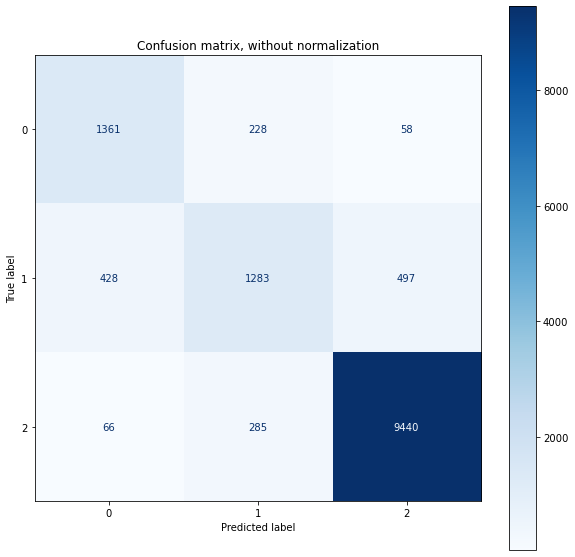

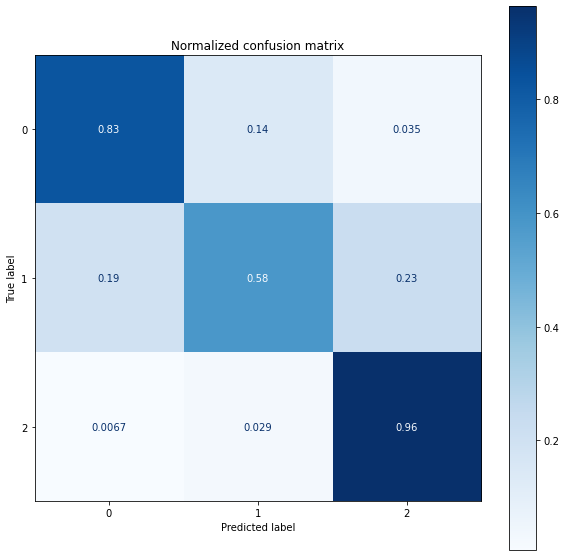

In [177]:
from sklearn.metrics import (mean_absolute_error, mean_squared_error, 
                             f1_score, accuracy_score, confusion_matrix,
                             ConfusionMatrixDisplay)
accuracy = accuracy_score(y_test, y_pred)
print('accuracy:', accuracy)
f1 = f1_score(y_test, y_pred, average='micro')
print('f1_micro:', f1)
f1 = f1_score(y_test, y_pred, average='macro')
print('f1_macro:', f1)
conf = confusion_matrix(y_test, y_pred)
print('confusion_matrix:\n', conf)

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
plt.rcParams['figure.figsize'] = [10, 10]
for title, normalize in titles_options:
#     plt.figure(figsize=(10,10)) 
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
#         display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
# mse = np.sqrt(mean_squared_error(y_test, y_pred))
# print('MSE:', mse)

# plt.figure()
# plt.hist(y, bins=100)
# plt.axvline(x=mae, color="red", label='MAE')
# # plt.axvline(x=mse, color="orange", label='MSE')
# plt.legend(loc='best')
# plt.xscale('log')
# plt.show()

[]

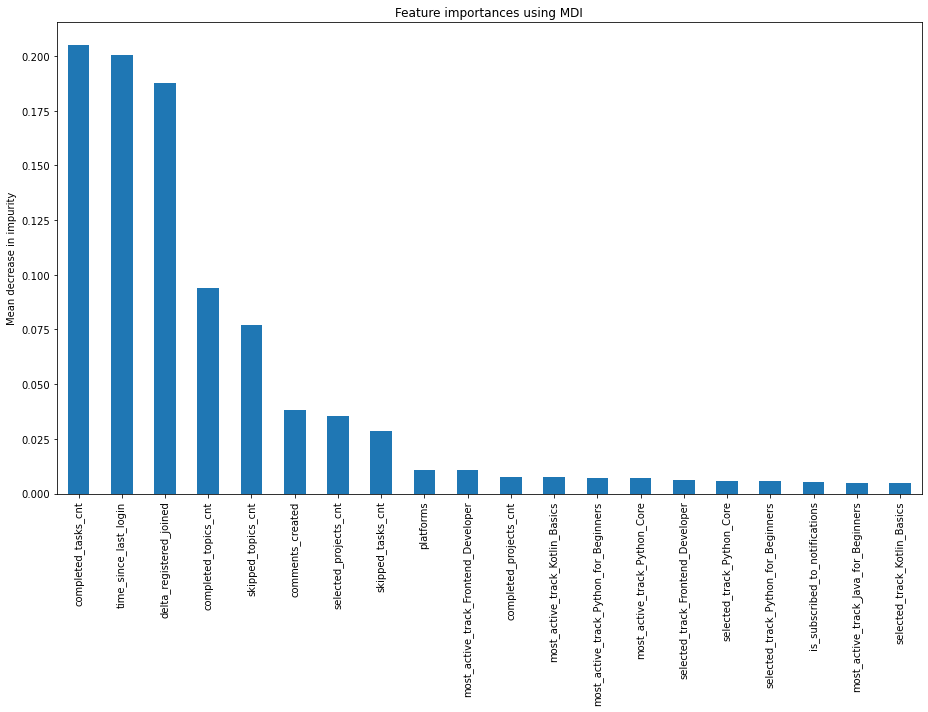

In [178]:
importances = reg.feature_importances_
std = np.std([tree.feature_importances_ for tree in reg.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots(figsize=(13,10))

forest_importances_pic = forest_importances.sort_values(ascending=False).iloc[:20]

forest_importances_pic.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
ax.plot(figsize=(0,10))

In [179]:
data_clever.to_csv('data/data_clever_fit_with_clusters')

In [180]:
from catboost import CatBoostClassifier, Pool

In [181]:
# initialize Pool
train_pool = Pool(X_train, 
                  y_train)
test_pool = Pool(X_test) 
# cat_features=[0,2,5]

In [182]:
# specify the training parameters 
model = CatBoostClassifier(iterations=3000, 
                          depth=3, 
                          learning_rate=0.7)
#train the model
model.fit(train_pool, plot=True)
# make the prediction using the resulting model
preds = model.predict(test_pool)
print(preds)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4534234	total: 14.1ms	remaining: 42.3s
1:	learn: 0.3569151	total: 24.7ms	remaining: 37s
2:	learn: 0.3230763	total: 36.9ms	remaining: 36.8s
3:	learn: 0.3096827	total: 49.8ms	remaining: 37.3s
4:	learn: 0.3012654	total: 62.2ms	remaining: 37.3s
5:	learn: 0.2978309	total: 70.6ms	remaining: 35.2s
6:	learn: 0.2955577	total: 81.6ms	remaining: 34.9s
7:	learn: 0.2935132	total: 90.1ms	remaining: 33.7s
8:	learn: 0.2915663	total: 101ms	remaining: 33.7s
9:	learn: 0.2895743	total: 112ms	remaining: 33.5s
10:	learn: 0.2879934	total: 120ms	remaining: 32.7s
11:	learn: 0.2854170	total: 130ms	remaining: 32.4s
12:	learn: 0.2849959	total: 138ms	remaining: 31.7s
13:	learn: 0.2843683	total: 146ms	remaining: 31.1s
14:	learn: 0.2810573	total: 154ms	remaining: 30.7s
15:	learn: 0.2802193	total: 162ms	remaining: 30.2s
16:	learn: 0.2794604	total: 169ms	remaining: 29.7s
17:	learn: 0.2789815	total: 177ms	remaining: 29.3s
18:	learn: 0.2785893	total: 184ms	remaining: 28.9s
19:	learn: 0.2783971	total: 192ms	r

177:	learn: 0.2513228	total: 1.57s	remaining: 24.9s
178:	learn: 0.2512807	total: 1.58s	remaining: 25s
179:	learn: 0.2510526	total: 1.59s	remaining: 24.9s
180:	learn: 0.2510102	total: 1.6s	remaining: 24.9s
181:	learn: 0.2509063	total: 1.61s	remaining: 24.9s
182:	learn: 0.2508038	total: 1.62s	remaining: 24.9s
183:	learn: 0.2506174	total: 1.63s	remaining: 24.9s
184:	learn: 0.2505583	total: 1.63s	remaining: 24.9s
185:	learn: 0.2504320	total: 1.64s	remaining: 24.8s
186:	learn: 0.2503416	total: 1.65s	remaining: 24.8s
187:	learn: 0.2501854	total: 1.66s	remaining: 24.8s
188:	learn: 0.2501216	total: 1.67s	remaining: 24.8s
189:	learn: 0.2499217	total: 1.67s	remaining: 24.8s
190:	learn: 0.2498858	total: 1.68s	remaining: 24.7s
191:	learn: 0.2497714	total: 1.69s	remaining: 24.7s
192:	learn: 0.2497463	total: 1.7s	remaining: 24.7s
193:	learn: 0.2496784	total: 1.71s	remaining: 24.7s
194:	learn: 0.2496011	total: 1.71s	remaining: 24.6s
195:	learn: 0.2495590	total: 1.72s	remaining: 24.6s
196:	learn: 0.24

341:	learn: 0.2399449	total: 2.94s	remaining: 22.8s
342:	learn: 0.2398797	total: 2.95s	remaining: 22.8s
343:	learn: 0.2398158	total: 2.95s	remaining: 22.8s
344:	learn: 0.2397239	total: 2.96s	remaining: 22.8s
345:	learn: 0.2394337	total: 2.97s	remaining: 22.8s
346:	learn: 0.2393792	total: 2.98s	remaining: 22.8s
347:	learn: 0.2393523	total: 2.99s	remaining: 22.8s
348:	learn: 0.2393321	total: 3s	remaining: 22.8s
349:	learn: 0.2393065	total: 3s	remaining: 22.8s
350:	learn: 0.2392369	total: 3.01s	remaining: 22.7s
351:	learn: 0.2392067	total: 3.02s	remaining: 22.7s
352:	learn: 0.2391723	total: 3.03s	remaining: 22.7s
353:	learn: 0.2391463	total: 3.03s	remaining: 22.7s
354:	learn: 0.2389760	total: 3.04s	remaining: 22.7s
355:	learn: 0.2389287	total: 3.05s	remaining: 22.7s
356:	learn: 0.2389084	total: 3.06s	remaining: 22.6s
357:	learn: 0.2388428	total: 3.07s	remaining: 22.6s
358:	learn: 0.2388034	total: 3.07s	remaining: 22.6s
359:	learn: 0.2387943	total: 3.08s	remaining: 22.6s
360:	learn: 0.2387

516:	learn: 0.2303344	total: 4.52s	remaining: 21.7s
517:	learn: 0.2302856	total: 4.53s	remaining: 21.7s
518:	learn: 0.2302618	total: 4.55s	remaining: 21.7s
519:	learn: 0.2302078	total: 4.56s	remaining: 21.7s
520:	learn: 0.2301388	total: 4.57s	remaining: 21.8s
521:	learn: 0.2300157	total: 4.58s	remaining: 21.7s
522:	learn: 0.2299427	total: 4.59s	remaining: 21.8s
523:	learn: 0.2298466	total: 4.61s	remaining: 21.8s
524:	learn: 0.2297414	total: 4.61s	remaining: 21.8s
525:	learn: 0.2297209	total: 4.63s	remaining: 21.8s
526:	learn: 0.2297084	total: 4.64s	remaining: 21.8s
527:	learn: 0.2296675	total: 4.65s	remaining: 21.8s
528:	learn: 0.2296196	total: 4.66s	remaining: 21.8s
529:	learn: 0.2295320	total: 4.67s	remaining: 21.8s
530:	learn: 0.2294457	total: 4.68s	remaining: 21.8s
531:	learn: 0.2293839	total: 4.69s	remaining: 21.8s
532:	learn: 0.2293558	total: 4.7s	remaining: 21.8s
533:	learn: 0.2292828	total: 4.72s	remaining: 21.8s
534:	learn: 0.2292373	total: 4.72s	remaining: 21.8s
535:	learn: 0

691:	learn: 0.2228883	total: 6.08s	remaining: 20.3s
692:	learn: 0.2228574	total: 6.09s	remaining: 20.3s
693:	learn: 0.2228534	total: 6.1s	remaining: 20.3s
694:	learn: 0.2228437	total: 6.11s	remaining: 20.3s
695:	learn: 0.2227548	total: 6.12s	remaining: 20.2s
696:	learn: 0.2227011	total: 6.13s	remaining: 20.2s
697:	learn: 0.2226817	total: 6.13s	remaining: 20.2s
698:	learn: 0.2226187	total: 6.14s	remaining: 20.2s
699:	learn: 0.2226048	total: 6.15s	remaining: 20.2s
700:	learn: 0.2225858	total: 6.16s	remaining: 20.2s
701:	learn: 0.2225565	total: 6.17s	remaining: 20.2s
702:	learn: 0.2224697	total: 6.17s	remaining: 20.2s
703:	learn: 0.2224471	total: 6.18s	remaining: 20.2s
704:	learn: 0.2224428	total: 6.19s	remaining: 20.2s
705:	learn: 0.2223370	total: 6.2s	remaining: 20.1s
706:	learn: 0.2223269	total: 6.21s	remaining: 20.1s
707:	learn: 0.2223127	total: 6.21s	remaining: 20.1s
708:	learn: 0.2222734	total: 6.22s	remaining: 20.1s
709:	learn: 0.2222349	total: 6.23s	remaining: 20.1s
710:	learn: 0.

865:	learn: 0.2166892	total: 7.58s	remaining: 18.7s
866:	learn: 0.2166806	total: 7.59s	remaining: 18.7s
867:	learn: 0.2166598	total: 7.6s	remaining: 18.7s
868:	learn: 0.2165465	total: 7.61s	remaining: 18.7s
869:	learn: 0.2165329	total: 7.62s	remaining: 18.7s
870:	learn: 0.2165061	total: 7.63s	remaining: 18.7s
871:	learn: 0.2164365	total: 7.64s	remaining: 18.6s
872:	learn: 0.2164019	total: 7.65s	remaining: 18.6s
873:	learn: 0.2163836	total: 7.67s	remaining: 18.6s
874:	learn: 0.2163290	total: 7.68s	remaining: 18.6s
875:	learn: 0.2163055	total: 7.69s	remaining: 18.6s
876:	learn: 0.2162823	total: 7.7s	remaining: 18.6s
877:	learn: 0.2162535	total: 7.7s	remaining: 18.6s
878:	learn: 0.2162258	total: 7.71s	remaining: 18.6s
879:	learn: 0.2161925	total: 7.72s	remaining: 18.6s
880:	learn: 0.2161584	total: 7.73s	remaining: 18.6s
881:	learn: 0.2161425	total: 7.74s	remaining: 18.6s
882:	learn: 0.2161211	total: 7.74s	remaining: 18.6s
883:	learn: 0.2161047	total: 7.75s	remaining: 18.6s
884:	learn: 0.2

1035:	learn: 0.2112846	total: 9.14s	remaining: 17.3s
1036:	learn: 0.2112544	total: 9.15s	remaining: 17.3s
1037:	learn: 0.2112375	total: 9.16s	remaining: 17.3s
1038:	learn: 0.2112072	total: 9.17s	remaining: 17.3s
1039:	learn: 0.2112033	total: 9.18s	remaining: 17.3s
1040:	learn: 0.2111739	total: 9.19s	remaining: 17.3s
1041:	learn: 0.2111281	total: 9.19s	remaining: 17.3s
1042:	learn: 0.2110828	total: 9.2s	remaining: 17.3s
1043:	learn: 0.2110666	total: 9.21s	remaining: 17.3s
1044:	learn: 0.2110609	total: 9.22s	remaining: 17.2s
1045:	learn: 0.2110141	total: 9.22s	remaining: 17.2s
1046:	learn: 0.2110003	total: 9.23s	remaining: 17.2s
1047:	learn: 0.2109729	total: 9.24s	remaining: 17.2s
1048:	learn: 0.2109609	total: 9.25s	remaining: 17.2s
1049:	learn: 0.2109271	total: 9.26s	remaining: 17.2s
1050:	learn: 0.2107923	total: 9.27s	remaining: 17.2s
1051:	learn: 0.2107741	total: 9.27s	remaining: 17.2s
1052:	learn: 0.2107625	total: 9.28s	remaining: 17.2s
1053:	learn: 0.2107174	total: 9.29s	remaining: 

1194:	learn: 0.2070299	total: 10.5s	remaining: 15.9s
1195:	learn: 0.2070207	total: 10.5s	remaining: 15.9s
1196:	learn: 0.2069815	total: 10.5s	remaining: 15.9s
1197:	learn: 0.2069755	total: 10.6s	remaining: 15.9s
1198:	learn: 0.2069067	total: 10.6s	remaining: 15.9s
1199:	learn: 0.2068911	total: 10.6s	remaining: 15.9s
1200:	learn: 0.2068822	total: 10.6s	remaining: 15.8s
1201:	learn: 0.2068612	total: 10.6s	remaining: 15.8s
1202:	learn: 0.2068288	total: 10.6s	remaining: 15.8s
1203:	learn: 0.2068164	total: 10.6s	remaining: 15.8s
1204:	learn: 0.2067833	total: 10.6s	remaining: 15.8s
1205:	learn: 0.2067766	total: 10.6s	remaining: 15.8s
1206:	learn: 0.2067590	total: 10.6s	remaining: 15.8s
1207:	learn: 0.2067531	total: 10.6s	remaining: 15.8s
1208:	learn: 0.2067350	total: 10.6s	remaining: 15.8s
1209:	learn: 0.2066980	total: 10.6s	remaining: 15.7s
1210:	learn: 0.2066360	total: 10.7s	remaining: 15.7s
1211:	learn: 0.2066050	total: 10.7s	remaining: 15.7s
1212:	learn: 0.2065868	total: 10.7s	remaining:

1371:	learn: 0.2026723	total: 12.6s	remaining: 15s
1372:	learn: 0.2026642	total: 12.7s	remaining: 15s
1373:	learn: 0.2026559	total: 12.7s	remaining: 15s
1374:	learn: 0.2026419	total: 12.7s	remaining: 15s
1375:	learn: 0.2026291	total: 12.7s	remaining: 15s
1376:	learn: 0.2025912	total: 12.7s	remaining: 14.9s
1377:	learn: 0.2025728	total: 12.7s	remaining: 14.9s
1378:	learn: 0.2025286	total: 12.7s	remaining: 14.9s
1379:	learn: 0.2025184	total: 12.7s	remaining: 14.9s
1380:	learn: 0.2024899	total: 12.7s	remaining: 14.9s
1381:	learn: 0.2024860	total: 12.7s	remaining: 14.9s
1382:	learn: 0.2024798	total: 12.7s	remaining: 14.9s
1383:	learn: 0.2024271	total: 12.7s	remaining: 14.9s
1384:	learn: 0.2023629	total: 12.7s	remaining: 14.9s
1385:	learn: 0.2022852	total: 12.8s	remaining: 14.9s
1386:	learn: 0.2022570	total: 12.8s	remaining: 14.8s
1387:	learn: 0.2022458	total: 12.8s	remaining: 14.8s
1388:	learn: 0.2022367	total: 12.8s	remaining: 14.8s
1389:	learn: 0.2021971	total: 12.8s	remaining: 14.8s
139

1550:	learn: 0.1984295	total: 14.2s	remaining: 13.3s
1551:	learn: 0.1983947	total: 14.2s	remaining: 13.3s
1552:	learn: 0.1983733	total: 14.2s	remaining: 13.3s
1553:	learn: 0.1983636	total: 14.3s	remaining: 13.3s
1554:	learn: 0.1983361	total: 14.3s	remaining: 13.3s
1555:	learn: 0.1983015	total: 14.3s	remaining: 13.3s
1556:	learn: 0.1982651	total: 14.3s	remaining: 13.3s
1557:	learn: 0.1982478	total: 14.3s	remaining: 13.3s
1558:	learn: 0.1982172	total: 14.4s	remaining: 13.3s
1559:	learn: 0.1982134	total: 14.4s	remaining: 13.3s
1560:	learn: 0.1981681	total: 14.4s	remaining: 13.2s
1561:	learn: 0.1981628	total: 14.4s	remaining: 13.2s
1562:	learn: 0.1981318	total: 14.4s	remaining: 13.2s
1563:	learn: 0.1981058	total: 14.4s	remaining: 13.2s
1564:	learn: 0.1980934	total: 14.4s	remaining: 13.2s
1565:	learn: 0.1980804	total: 14.4s	remaining: 13.2s
1566:	learn: 0.1979874	total: 14.4s	remaining: 13.2s
1567:	learn: 0.1979684	total: 14.4s	remaining: 13.2s
1568:	learn: 0.1979323	total: 14.4s	remaining:

1727:	learn: 0.1944688	total: 15.8s	remaining: 11.6s
1728:	learn: 0.1944382	total: 15.8s	remaining: 11.6s
1729:	learn: 0.1944008	total: 15.8s	remaining: 11.6s
1730:	learn: 0.1943904	total: 15.8s	remaining: 11.6s
1731:	learn: 0.1943819	total: 15.8s	remaining: 11.6s
1732:	learn: 0.1943512	total: 15.8s	remaining: 11.6s
1733:	learn: 0.1943344	total: 15.8s	remaining: 11.6s
1734:	learn: 0.1943213	total: 15.8s	remaining: 11.6s
1735:	learn: 0.1943053	total: 15.9s	remaining: 11.5s
1736:	learn: 0.1943007	total: 15.9s	remaining: 11.5s
1737:	learn: 0.1942853	total: 15.9s	remaining: 11.5s
1738:	learn: 0.1942469	total: 15.9s	remaining: 11.5s
1739:	learn: 0.1942330	total: 15.9s	remaining: 11.5s
1740:	learn: 0.1942258	total: 15.9s	remaining: 11.5s
1741:	learn: 0.1941977	total: 15.9s	remaining: 11.5s
1742:	learn: 0.1941855	total: 15.9s	remaining: 11.5s
1743:	learn: 0.1941570	total: 15.9s	remaining: 11.5s
1744:	learn: 0.1941469	total: 15.9s	remaining: 11.5s
1745:	learn: 0.1941331	total: 15.9s	remaining:

1887:	learn: 0.1911365	total: 17.1s	remaining: 10.1s
1888:	learn: 0.1910870	total: 17.2s	remaining: 10.1s
1889:	learn: 0.1910833	total: 17.2s	remaining: 10.1s
1890:	learn: 0.1910637	total: 17.2s	remaining: 10.1s
1891:	learn: 0.1910594	total: 17.2s	remaining: 10.1s
1892:	learn: 0.1910516	total: 17.2s	remaining: 10.1s
1893:	learn: 0.1910414	total: 17.2s	remaining: 10s
1894:	learn: 0.1910268	total: 17.2s	remaining: 10s
1895:	learn: 0.1910221	total: 17.2s	remaining: 10s
1896:	learn: 0.1910141	total: 17.2s	remaining: 10s
1897:	learn: 0.1910096	total: 17.2s	remaining: 10s
1898:	learn: 0.1909950	total: 17.3s	remaining: 10s
1899:	learn: 0.1909849	total: 17.3s	remaining: 10s
1900:	learn: 0.1909518	total: 17.3s	remaining: 9.99s
1901:	learn: 0.1909287	total: 17.3s	remaining: 9.98s
1902:	learn: 0.1908626	total: 17.3s	remaining: 9.97s
1903:	learn: 0.1908479	total: 17.3s	remaining: 9.96s
1904:	learn: 0.1908342	total: 17.3s	remaining: 9.96s
1905:	learn: 0.1908225	total: 17.3s	remaining: 9.95s
1906:	l

2053:	learn: 0.1878074	total: 18.7s	remaining: 8.62s
2054:	learn: 0.1877983	total: 18.7s	remaining: 8.61s
2055:	learn: 0.1877921	total: 18.7s	remaining: 8.6s
2056:	learn: 0.1877684	total: 18.8s	remaining: 8.6s
2057:	learn: 0.1877522	total: 18.8s	remaining: 8.59s
2058:	learn: 0.1877429	total: 18.8s	remaining: 8.58s
2059:	learn: 0.1877348	total: 18.8s	remaining: 8.57s
2060:	learn: 0.1877067	total: 18.8s	remaining: 8.56s
2061:	learn: 0.1877026	total: 18.8s	remaining: 8.55s
2062:	learn: 0.1876892	total: 18.8s	remaining: 8.54s
2063:	learn: 0.1876664	total: 18.8s	remaining: 8.53s
2064:	learn: 0.1876630	total: 18.8s	remaining: 8.52s
2065:	learn: 0.1876510	total: 18.8s	remaining: 8.51s
2066:	learn: 0.1876260	total: 18.8s	remaining: 8.5s
2067:	learn: 0.1876207	total: 18.8s	remaining: 8.49s
2068:	learn: 0.1876048	total: 18.8s	remaining: 8.48s
2069:	learn: 0.1875900	total: 18.9s	remaining: 8.47s
2070:	learn: 0.1875431	total: 18.9s	remaining: 8.46s
2071:	learn: 0.1875278	total: 18.9s	remaining: 8.

2227:	learn: 0.1848959	total: 20.3s	remaining: 7.03s
2228:	learn: 0.1848854	total: 20.3s	remaining: 7.02s
2229:	learn: 0.1848780	total: 20.3s	remaining: 7.01s
2230:	learn: 0.1848699	total: 20.3s	remaining: 7s
2231:	learn: 0.1848618	total: 20.3s	remaining: 7s
2232:	learn: 0.1848437	total: 20.3s	remaining: 6.99s
2233:	learn: 0.1848232	total: 20.3s	remaining: 6.98s
2234:	learn: 0.1848163	total: 20.4s	remaining: 6.97s
2235:	learn: 0.1847954	total: 20.4s	remaining: 6.96s
2236:	learn: 0.1847922	total: 20.4s	remaining: 6.95s
2237:	learn: 0.1847801	total: 20.4s	remaining: 6.94s
2238:	learn: 0.1847670	total: 20.4s	remaining: 6.93s
2239:	learn: 0.1847322	total: 20.4s	remaining: 6.92s
2240:	learn: 0.1847288	total: 20.4s	remaining: 6.92s
2241:	learn: 0.1847106	total: 20.4s	remaining: 6.91s
2242:	learn: 0.1847051	total: 20.4s	remaining: 6.9s
2243:	learn: 0.1846461	total: 20.5s	remaining: 6.89s
2244:	learn: 0.1846270	total: 20.5s	remaining: 6.88s
2245:	learn: 0.1845840	total: 20.5s	remaining: 6.87s


2395:	learn: 0.1820428	total: 22s	remaining: 5.55s
2396:	learn: 0.1820239	total: 22s	remaining: 5.54s
2397:	learn: 0.1820043	total: 22s	remaining: 5.53s
2398:	learn: 0.1819956	total: 22.1s	remaining: 5.53s
2399:	learn: 0.1819801	total: 22.1s	remaining: 5.51s
2400:	learn: 0.1819602	total: 22.1s	remaining: 5.51s
2401:	learn: 0.1819387	total: 22.1s	remaining: 5.5s
2402:	learn: 0.1819152	total: 22.1s	remaining: 5.49s
2403:	learn: 0.1818918	total: 22.1s	remaining: 5.48s
2404:	learn: 0.1818717	total: 22.1s	remaining: 5.47s
2405:	learn: 0.1818630	total: 22.1s	remaining: 5.46s
2406:	learn: 0.1818205	total: 22.1s	remaining: 5.45s
2407:	learn: 0.1818088	total: 22.1s	remaining: 5.44s
2408:	learn: 0.1818062	total: 22.1s	remaining: 5.43s
2409:	learn: 0.1817999	total: 22.1s	remaining: 5.42s
2410:	learn: 0.1817896	total: 22.2s	remaining: 5.41s
2411:	learn: 0.1817564	total: 22.2s	remaining: 5.4s
2412:	learn: 0.1817424	total: 22.2s	remaining: 5.39s
2413:	learn: 0.1817312	total: 22.2s	remaining: 5.38s
2

2563:	learn: 0.1795058	total: 23.6s	remaining: 4.01s
2564:	learn: 0.1794820	total: 23.6s	remaining: 4s
2565:	learn: 0.1794743	total: 23.6s	remaining: 3.99s
2566:	learn: 0.1794435	total: 23.6s	remaining: 3.98s
2567:	learn: 0.1794389	total: 23.6s	remaining: 3.97s
2568:	learn: 0.1794234	total: 23.6s	remaining: 3.96s
2569:	learn: 0.1794192	total: 23.6s	remaining: 3.95s
2570:	learn: 0.1794079	total: 23.6s	remaining: 3.94s
2571:	learn: 0.1794009	total: 23.6s	remaining: 3.93s
2572:	learn: 0.1793913	total: 23.7s	remaining: 3.92s
2573:	learn: 0.1793576	total: 23.7s	remaining: 3.92s
2574:	learn: 0.1793433	total: 23.7s	remaining: 3.91s
2575:	learn: 0.1793372	total: 23.7s	remaining: 3.9s
2576:	learn: 0.1793278	total: 23.7s	remaining: 3.89s
2577:	learn: 0.1792971	total: 23.7s	remaining: 3.88s
2578:	learn: 0.1792784	total: 23.7s	remaining: 3.87s
2579:	learn: 0.1792553	total: 23.7s	remaining: 3.86s
2580:	learn: 0.1792500	total: 23.7s	remaining: 3.85s
2581:	learn: 0.1792459	total: 23.8s	remaining: 3.8

2725:	learn: 0.1770906	total: 25.5s	remaining: 2.57s
2726:	learn: 0.1770773	total: 25.6s	remaining: 2.56s
2727:	learn: 0.1770671	total: 25.6s	remaining: 2.55s
2728:	learn: 0.1770437	total: 25.6s	remaining: 2.54s
2729:	learn: 0.1770072	total: 25.6s	remaining: 2.53s
2730:	learn: 0.1769989	total: 25.6s	remaining: 2.52s
2731:	learn: 0.1769822	total: 25.6s	remaining: 2.51s
2732:	learn: 0.1769751	total: 25.6s	remaining: 2.5s
2733:	learn: 0.1769532	total: 25.6s	remaining: 2.49s
2734:	learn: 0.1769515	total: 25.6s	remaining: 2.48s
2735:	learn: 0.1769465	total: 25.7s	remaining: 2.48s
2736:	learn: 0.1769296	total: 25.7s	remaining: 2.47s
2737:	learn: 0.1769264	total: 25.7s	remaining: 2.46s
2738:	learn: 0.1769091	total: 25.7s	remaining: 2.45s
2739:	learn: 0.1768755	total: 25.7s	remaining: 2.44s
2740:	learn: 0.1768468	total: 25.7s	remaining: 2.43s
2741:	learn: 0.1768363	total: 25.7s	remaining: 2.42s
2742:	learn: 0.1768227	total: 25.7s	remaining: 2.41s
2743:	learn: 0.1768071	total: 25.7s	remaining: 

2887:	learn: 0.1747044	total: 27.3s	remaining: 1.06s
2888:	learn: 0.1746686	total: 27.3s	remaining: 1.05s
2889:	learn: 0.1746666	total: 27.3s	remaining: 1.04s
2890:	learn: 0.1746585	total: 27.3s	remaining: 1.03s
2891:	learn: 0.1746338	total: 27.4s	remaining: 1.02s
2892:	learn: 0.1746296	total: 27.4s	remaining: 1.01s
2893:	learn: 0.1746226	total: 27.4s	remaining: 1s
2894:	learn: 0.1746148	total: 27.4s	remaining: 993ms
2895:	learn: 0.1745977	total: 27.4s	remaining: 984ms
2896:	learn: 0.1745911	total: 27.4s	remaining: 974ms
2897:	learn: 0.1745814	total: 27.4s	remaining: 965ms
2898:	learn: 0.1745692	total: 27.4s	remaining: 955ms
2899:	learn: 0.1745674	total: 27.4s	remaining: 946ms
2900:	learn: 0.1745641	total: 27.4s	remaining: 937ms
2901:	learn: 0.1745460	total: 27.5s	remaining: 927ms
2902:	learn: 0.1745430	total: 27.5s	remaining: 918ms
2903:	learn: 0.1744858	total: 27.5s	remaining: 908ms
2904:	learn: 0.1744775	total: 27.5s	remaining: 899ms
2905:	learn: 0.1744752	total: 27.5s	remaining: 88

accuracy: 0.8855342224827788
f1_micro: 0.8855342224827787
f1_macro: 0.7907797732403309
confusion_matrix:
 [[1361  228   58]
 [ 428 1283  497]
 [  66  285 9440]]
Confusion matrix, without normalization
Normalized confusion matrix


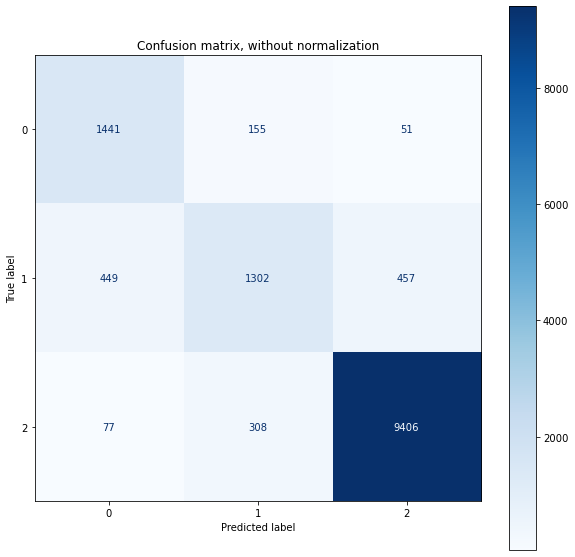

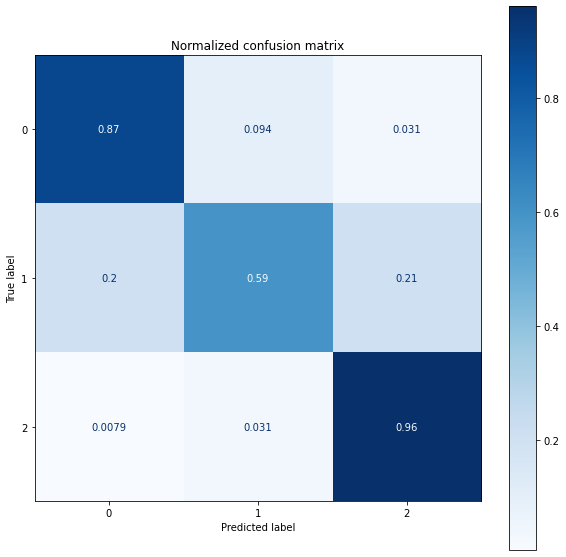

In [183]:
from sklearn.metrics import (mean_absolute_error, mean_squared_error, 
                             f1_score, accuracy_score, confusion_matrix,
                             ConfusionMatrixDisplay)
accuracy = accuracy_score(y_test, y_pred)
print('accuracy:', accuracy)
f1 = f1_score(y_test, y_pred, average='micro')
print('f1_micro:', f1)
f1 = f1_score(y_test, y_pred, average='macro')
print('f1_macro:', f1)
conf = confusion_matrix(y_test, y_pred)
print('confusion_matrix:\n', conf)

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
#         display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
#     print(disp.confusion_matrix)

plt.show()
# mse = np.sqrt(mean_squared_error(y_test, y_pred))
# print('MSE:', mse)

# plt.figure()
# plt.hist(y, bins=100)
# plt.axvline(x=mae, color="red", label='MAE')
# # plt.axvline(x=mse, color="orange", label='MSE')
# plt.legend(loc='best')
# plt.xscale('log')
# plt.show()